# **Import Library**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHP3417/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHP3417/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteHP3417/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
# Parameters

vocab_size = 20000 # Jumlah vocab dalam suatu model
max_len = 200 # Panjang maksimal suatu ulasan
embedding_dim = 16 # Menentukan dimensi dari vektor embedding yang digunakan untuk mewakili kata-kata
trunc_type='post' # Memotong teks dari bagian belakang jika lebih panjang dari max_len (Jika menggunakan 'pre' sebaliknya memotong dari depan)
oov_tok = "<OOV>" # Menentukan token yang tidak termasuk dalam vocabulary

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_len, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_len)

In [ ]:
model = models.Sequential([layers.Embedding(vocab_size, embedding_dim, input_length=max_len),
                           layers.Conv1D(64, 5, activation='relu'),
                           layers.MaxPooling1D(4),
                           layers.LSTM(128),
                           layers.Dense(1, activation='sigmoid')])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
num_epochs = 10

history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 73s 78ms/step - loss: 0.4007 - accuracy: 0.8086 - val_loss: 0.3136 - val_accuracy: 0.8631
Epoch 2/10
782/782 [==============================] - 17s 22ms/step - loss: 0.2069 - accuracy: 0.9252 - val_loss: 0.3128 - val_accuracy: 0.8690
Epoch 3/10
782/782 [==============================] - 13s 17ms/step - loss: 0.1200 - accuracy: 0.9615 - val_loss: 0.4046 - val_accuracy: 0.8554
Epoch 4/10
782/782 [==============================] - 12s 15ms/step - loss: 0.0781 - accuracy: 0.9759 - val_loss: 0.4091 - val_accuracy: 0.8602
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 0.0467 - accuracy: 0.9864 - val_loss: 0.5481 - val_accuracy: 0.8496
Epoch 6/10
782/782 [==============================] - 10s 12ms/step - loss: 0.0303 - accuracy: 0.9912 - val_loss: 0.6781 - val_accuracy: 0.8404
Epoch 7/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0212 - accuracy: 0.9940 - val_loss: 0.6340 - val_accuracy:

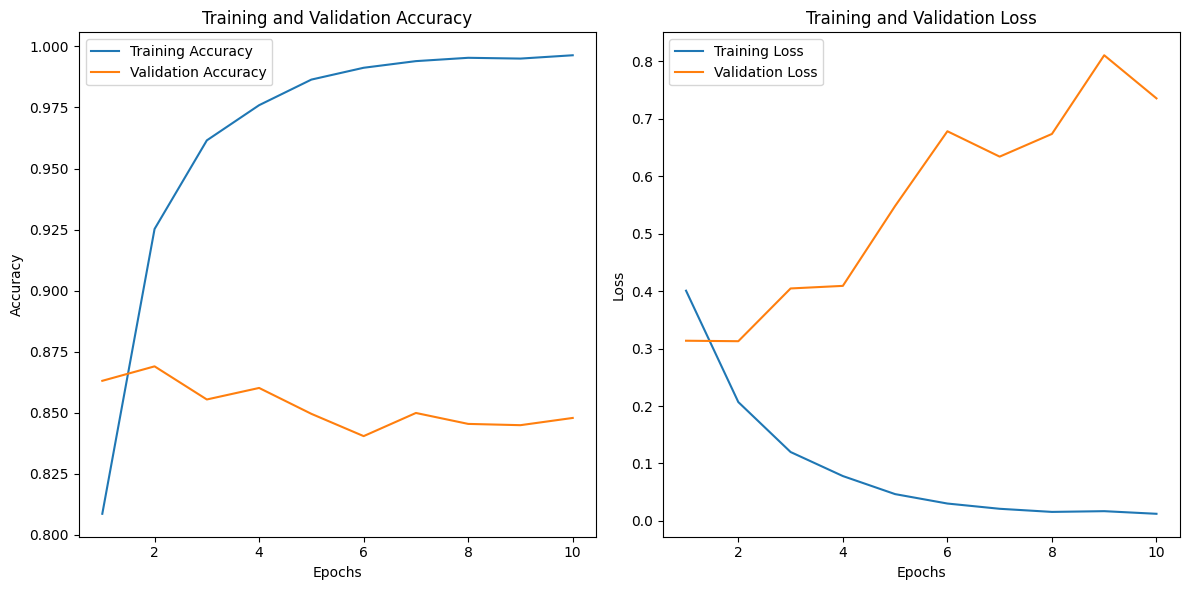

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()